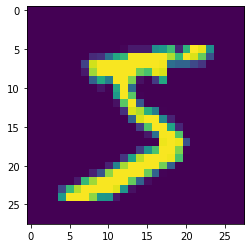

5
(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
"""
Download and set MNIST datasets
Ref.
[1] https://qiita.com/python_walker/items/e4d2ae5b7196cb07402b
[2] https://github.com/oreilly-japan/deep-leaning-from-scratch
[3] Deep Learning from scratch - theory and practice
    of deep-learning with Python

or conda install command:
[4] https://anaconda.org/conda-forge/mnist
"""
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import gzip
import pickle


class MNIST_setting:
    def __init__(self):
        # Directory path
        # (Please change your directory path)
        self.dataset_dir = 'C:\MNIST-datasets'

        # MNIST official site URL
        self.url_base = 'http://yann.lecun.com/exdb/mnist/'

        # MNIST files
        self.key_file = {
            'train_img': 'train-images-idx3-ubyte.gz',
            'train_label': 'train-labels-idx1-ubyte.gz',
            'test_img': 't10k-images-idx3-ubyte.gz',
            'test_label': 't10k-labels-idx1-ubyte.gz'
        }

        # save file path
        self.save_file = self.dataset_dir + '/mnist.pkl'  # .pkl

        self.dataset = {}

        # train data
        self.dataset['train_img'] = self.load_img(self.key_file['train_img'])
        self.dataset['train_label'] = self.load_label(
            self.key_file['train_label'])

        # test data
        self.dataset['test_img'] = self.load_img(self.key_file['test_img'])
        self.dataset['test_label'] = self.load_label(
            self.key_file['test_label'])

    def download_mnist(self):
        for v in self.key_file.values():
            # local
            file_path = self.dataset_dir + '/' + v
            urllib.request.urlretrieve(self.url_base + v, file_path)

    # for graph
    def load_img(self, file_name):
        # local variables
        file_path = self.dataset_dir + '/' + file_name
        with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
            data = data.reshape(-1, 784)

            return data

    # for graph
    def load_label(self, file_name):
        file_path = self.dataset_dir + '/' + file_name
        with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)

            return labels

    def graph(self, i):
        with open(self.save_file, 'wb') as f:
            # -1: Save the latest protcol version
            pickle.dump(self.dataset, f, -1)

        with open(self.save_file, 'rb') as f:
            self.dataset = pickle.load(f)

        # show example
        example = self.dataset['train_img'][i].reshape((28, 28))

        plt.imshow(example)
        plt.show()

    def to_one_hot(self, label):
        T = np.zeros((label.size, 10))
        for i in range(label.size):
            T[i][label[i]] = 1

        return T

    def normalize(self, key):
        self.dataset[key] = self.dataset[key].astype(np.float32)
        self.dataset[key] /= 255

        return self.dataset[key]


if __name__ == '__main__':
    stm = MNIST_setting()
    stm.i = 0
    index = stm.dataset['train_label'][stm.i]
    label = stm.dataset['train_label']
    key = 'train_img'

    # If you have not downloaded MNIST yet,
    # change cnt = 0.
    cnt = 1
    if cnt == 0:
        stm.download_mnist()

    stm.graph(stm.i)
    # one hot form
    hot = stm.to_one_hot(label)
    # normalize
    stm.dataset[key] = stm.normalize(key)

    print(index)      # -> 5
    print(hot.shape)  # -> (60000, 10)
    print(stm.dataset[key])
    """
    ->
    [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]
    """
